# You've Got a FRED

In [1]:
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Hodrick-Prescott filter analysis

### GDP Analysis

In [2]:
# Read the GDP csv data from FRED and set the column `DATE` as a datetime index
file_path = Path("./data/gdp_data.csv")
gdp = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
gdp.head()

,GDP
DATE,
2004-01-01,11920.169
2004-04-01,12108.987
2004-07-01,12303.340
2004-10-01,12522.425
2005-01-01,12761.337


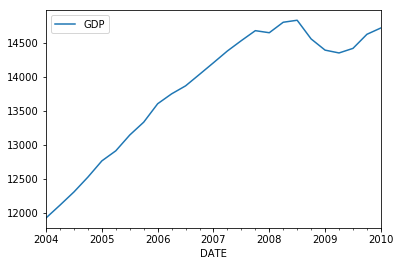

In [3]:
# Plot the raw GDP data as a line plot
gdp.plot()

In [4]:
import statsmodels.api as sm

In [5]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
noise_ts, trend_ts = sm.tsa.filters.hpfilter(gdp['GDP'])

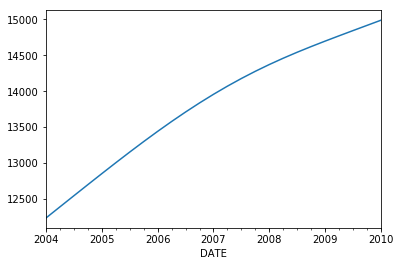

In [6]:
# Plot the GDP trend data as a line plot
trend_ts.plot()

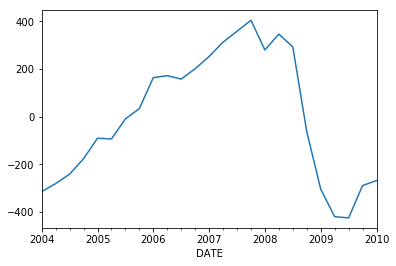

In [7]:
# Plot the GDP noise data as a line plot
noise_ts.plot()

---

### Inflation

In [8]:
# Read the Inflation csv data from FRED and set the column `DATE` as a datetime index
# Note: Inflation, as measured by consumer price index in urban areas
file_path = Path("./data/inflation_data.csv")
inflation = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
inflation.head()

,CPIAUCNS
DATE,
2004-01-01,185.2
2004-02-01,186.2
2004-03-01,187.4
2004-04-01,188.0
2004-05-01,189.1


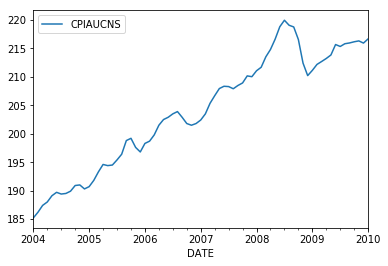

In [9]:
# Plot the raw inflation data as a line plot
inflation.plot()

In [10]:
# Use the `hpfilter` function to decompose the `CPIAUCNS` column into the trend and noise components.
noise_2_ts, trend_2_ts = sm.tsa.filters.hpfilter(inflation['CPIAUCNS'])

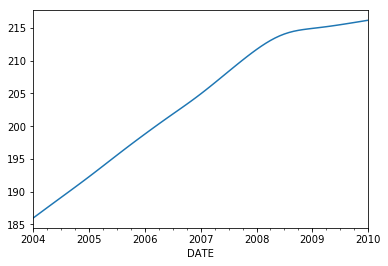

In [11]:
# Plot the inflation trend data as a line plot
trend_2_ts.plot()

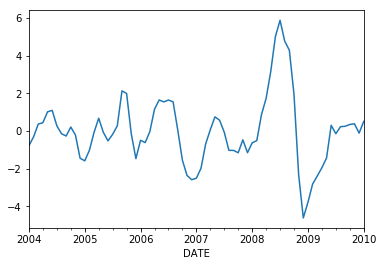

In [12]:
# Plot the inflation noise data as a line plot
noise_2_ts.plot()

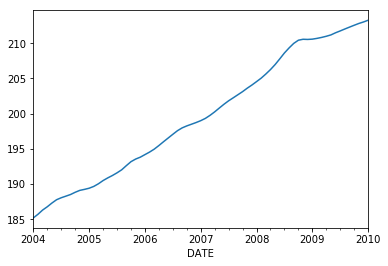

In [13]:
# Plot the exponentially-weighted moving average for the inflation data
inflation['CPIAUCNS'].ewm(halflife=10).mean().plot()

---

### Job Data

In [14]:
# Read the job count csv data from FRED and set the column `DATE` as a datetime index
# Note: This is the total number of non-farm payrolls
file_path = Path("./data/job_roll_data.csv")
job_roll = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
job_roll.head()

,PAYEMS
DATE,
2004-01-01,130787
2004-02-01,130844
2004-03-01,131156
2004-04-01,131426
2004-05-01,131710


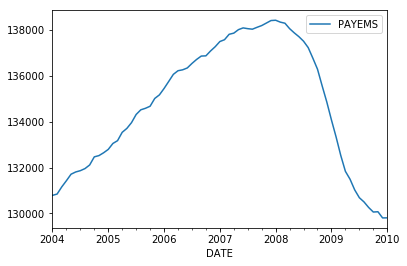

In [15]:
# Plot the raw job data as a line plot
job_roll.plot()

In [16]:
# Use the `hpfilter` function to decompose the `PAYEMS` column into the trend and noise components.
noise_3_ts, trend_3_ts = sm.tsa.filters.hpfilter(job_roll['PAYEMS'])

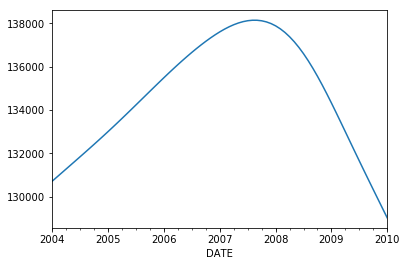

In [17]:
# Plot the job trend data as a line plot
trend_3_ts.plot()

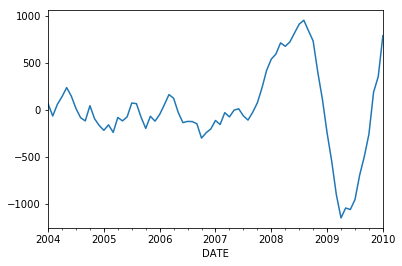

In [18]:
# Plot the job noise data as a line plot
noise_3_ts.plot()

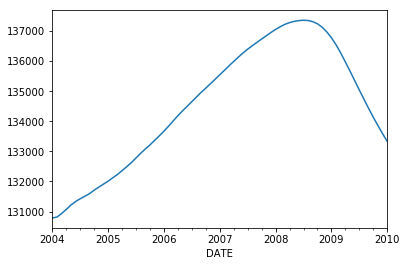

In [19]:
# Plot the exponentially-weighted moving average for the job data
job_roll['PAYEMS'].ewm(halflife=10).mean().plot()